In [1]:
# https://nbconvert.readthedocs.io/en/latest/removing_cells.html
# use these magic spells to update your classes methods on-the-fly as you edit them:
%reload_ext autoreload
%autoreload 2
from pprint import pprint
from IPython.core.display import display, HTML, Markdown
import ipywidgets as widgets
# %run includeme.ipynb # include a notebook from this same directory
display(HTML("<style>.container { width:100% !important; }</style>"))

/tmp/ipykernel_34697/1348678174.py:6: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML, Markdown


CompressAI-Vision uses fiftyone to handle datasets.  Let's take a closer look into what this means.

You are probably familiar with the COCO API and the like, i.e a directory structures that looks like this:
```
annotations/
    json files
train2007_dataset/
    image files
...
...
```
Then you have an API that reads those json files which have image metadata, ground truths for images (bboxes, segmasks, etc.).  Another such example is the [ImageFolder](https://pytorch.org/vision/stable/generated/torchvision.datasets.ImageFolder.html) directory structure.

Fiftyone takes the obvious next step in handling datasets (metadata and ground truths) and **uses a database**!

The datasets are saved into a *database* instead, namely into mongodb.  The interface to mongodb is handles seamlessly through fiftyone API.

Using a database has several obvious advantages.  Some of these are: the ability to share data among your research group, creating copies of the dataset, adding more data to each sample (say detection results) etc.

The complication in using a database is that you need a *database server*.  Fiftyone makes this seamless as it start a stand-alone mongodb server each time you type "import fiftyone".  Alternatively, you can use a common (remote) mongodb server for your whole research group for sharing data and/or if you're working in a supercomputing / grid environment.

Let's take a closer look:

In [2]:
# image tool imports
from PIL import Image
import matplotlib.pyplot as plt

In [3]:
# fiftyone
import fiftyone as fo
import fiftyone.zoo as foz

Lets take a look at the datasets registered to fiftyone:

In [4]:
fo.list_datasets()

['mpeg-vcm-detection',
 'mpeg-vcm-detection-dummy',
 'mpeg-vcm-segmentation',
 'open-images-v6-validation',
 'quickstart',
 'quickstart-2-dummy']

Let's get a handle to a dataset:

In [5]:
dataset=fo.load_dataset("quickstart")

Let's see how many *samples* we have in it:

In [6]:
len(dataset)

200

Let's take a look at the first sample:

In [7]:
sample=dataset.first()
print(sample)

<Sample: {
    'id': '634472860faf93a9a586c9c4',
    'media_type': 'image',
    'filepath': '/home/sampsa/fiftyone/quickstart/data/000880.jpg',
    'tags': BaseList(['validation']),
    'metadata': None,
    'ground_truth': <Detections: {
        'detections': BaseList([
            <Detection: {
                'id': '5f452471ef00e6374aac53c8',
                'attributes': BaseDict({}),
                'tags': BaseList([]),
                'label': 'bird',
                'bounding_box': BaseList([
                    0.21084375,
                    0.0034375,
                    0.46190625,
                    0.9442083333333334,
                ]),
                'mask': None,
                'confidence': None,
                'index': None,
                'area': 73790.37944999996,
                'iscrowd': 0.0,
            }>,
            <Detection: {
                'id': '5f452471ef00e6374aac53c9',
                'attributes': BaseDict({}),
                'tags': BaseLis

Here we can see that there are bbox ground truths.  Please also note that fiftyone/mongodb does *not* save the images themselves but just their path.  When running mAP evaluations on a dataset, detection results can be saved into the same database (say, with key "detections") and then ground truths and detections can be compared within the same dataset (instead of writing lots of intermediate files on the disk like with COCO API or with the tensorflow tools).

Let's load an image:

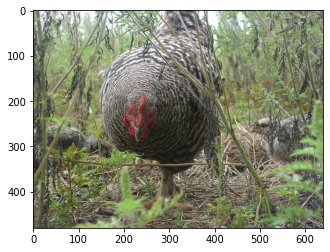

In [8]:
plt.imshow(Image.open(sample["filepath"]))

Let's see a summary of the dataset and what kind of fields each samples has:

In [9]:
print(dataset)

Name:        quickstart
Media type:  image
Num samples: 200
Persistent:  True
Tags:        []
Sample fields:
    id:           fiftyone.core.fields.ObjectIdField
    filepath:     fiftyone.core.fields.StringField
    tags:         fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:     fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    ground_truth: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    uniqueness:   fiftyone.core.fields.FloatField
    predictions:  fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)


You can visualize the whole dataset conveniently with:
```
session = fo.launch_app(dataset)
```

For more info, please visit [fiftyone documentation](https://voxel51.com/docs/fiftyone/)

Here at the final, a small recompilation/cheatsheet of selected fiftyone features

In [21]:
# Access by sample id
sample=dataset["634472860faf93a9a586c9c4"]

In [19]:
# Search by a field value.  You might need this one with the with open_images_id field.
from fiftyone import ViewField as F
tmpset=dataset[F("filepath") == dataset.first().filepath]
print(tmpset)

Dataset:     quickstart
Media type:  image
Num samples: 1
Sample fields:
    id:           fiftyone.core.fields.ObjectIdField
    filepath:     fiftyone.core.fields.StringField
    tags:         fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:     fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    ground_truth: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    uniqueness:   fiftyone.core.fields.FloatField
    predictions:  fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
View stages:
    1. Match(filter={'$expr': {'$eq': [...]}})
